# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [6]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
print(data.shape)

(100, 3)


Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [7]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
y = np.reshape(y, (y.shape[0],1))
m = X.shape[0]

In [8]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100, 1)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [9]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1 / (1 + math.exp(-1*z))

In [10]:
def logistic(h):
    for i in range(h.shape[0]):
        h[i] = Sigmoid(h[i])
    return h

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [11]:
def computeCost(X, y, theta):
    m = X.shape[0]
    y = y.reshape(y.shape[0], 1)
    h = np.matmul(X, theta)
    H = logistic(h)
    return (sum((y)*np.log(H) + (1-y)*np.log(1-H))) / (m)

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [18]:
def gradientDescent(X, y, theta, alpha, iterations):
    J_history = []
    theta0_history = []
    theta1_history = []
    for i in range(iterations):
        H = logistic(np.matmul(X, theta))
        a = np.matmul(X.T, H - y).reshape((theta.shape[0],1))  
        theta = theta - ((alpha / m) * a)
        
        # store history values
        theta0_history.append(theta[0].tolist()[0])
        theta1_history.append(theta[1].tolist()[0])
        J_history.append(computeCost(X,y,theta).tolist()[0])
        
    return (theta, J_history, theta0_history, theta1_history)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [13]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [14]:
initialCost=computeCost(X, y, theta)

Appel des la fonction de calcul du gradient

In [19]:
# paramètres
iterations = 1500;
alpha = 0.01;

# Appel
theta, J_history, theta0_history, theta1_history = gradientDescent(X, y, theta, alpha, iterations);
print(theta)

[[-2.64363049]
 [ 0.15128056]
 [ 0.11051942]]


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [20]:
def drawLine():
    y_pred= np.matmul(X,theta)
    y = data[:,1]
    plt.scatter(X[:,1],y,marker ='x')
    plt.plot(X,y_pred)

# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

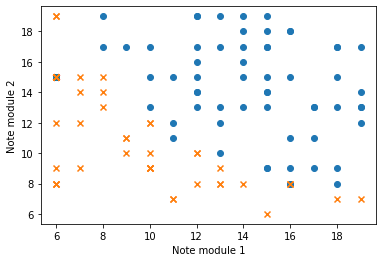

In [115]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

Traçage du coût en fonction de theta0 et theta1

C:\Temp/ipykernel_9096/2614330218.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax= fig.gca(projection='3d')


ValueError: Argument Z must be 2-dimensional.

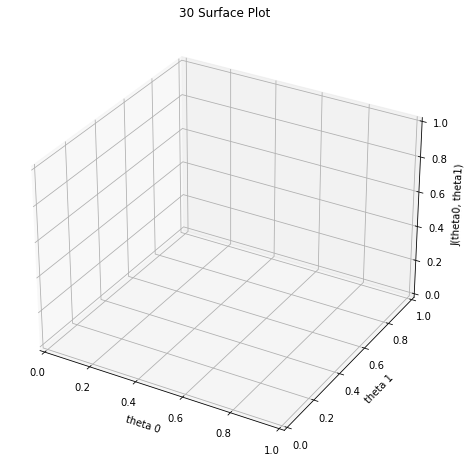

In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt. figure(figsize=(10, 8)) 
ax= fig.gca(projection='3d')
ax.set_title('30 Surface Plot')
ax. set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('J(theta0, theta1)')

x1 = np.arange(-10, 10, 0.05)
x2 = np.arange (-10, 10, 0.05)
x1, x2 = np.meshgrid(x1, x2)
surface = ax.plot_surface(theta0_history, theta1_history, initialCost, linewidth=0)
fig.colorbar(surface, shrink=0.5)

fig.show

Prédire des valeurs de y

In [ ]:
# Predire pour des notes note1= 9 et note2=17


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])
clf.score(X, y)

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [ ]:
# bonne chance